In [1]:
from keras import backend as k
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#Define the ConvNet
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Conv2D(50, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        #Flatten
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        #a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        
        return model

In [3]:
#Network and Training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 28, 28
NB_CLASSES = 10
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [4]:
# DATA Shuffled and Split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
k.set_image_dim_ordering("th")
# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# we need a 60K x [1 x 28 x28] shape as input to the ConvNet
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
#convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

(60000, 'train samples')
(10000, 'test samples')


In [5]:
#Initialize the Optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 104s 2ms/step - loss: 0.1769 - acc: 0.9468 - val_loss: 0.0635 - val_acc: 0.9815
Epoch 2/20
48000/48000 [==============================] - 107s 2ms/step - loss: 0.0484 - acc: 0.9848 - val_loss: 0.0406 - val_acc: 0.9879
Epoch 3/20
48000/48000 [==============================] - 106s 2ms/step - loss: 0.0327 - acc: 0.9898 - val_loss: 0.0441 - val_acc: 0.9860
Epoch 4/20
48000/48000 [==============================] - 107s 2ms/step - loss: 0.0223 - acc: 0.9930 - val_loss: 0.0409 - val_acc: 0.9877
Epoch 5/20
48000/48000 [==============================] - 111s 2ms/step - loss: 0.0176 - acc: 0.9939 - val_loss: 0.0374 - val_acc: 0.9892
Epoch 6/20
48000/48000 [==============================] - 111s 2ms/step - loss: 0.0137 - acc: 0.9953 - val_loss: 0.0353 - val_acc: 0.9899
Epoch 7/20
48000/48000 [==============================] - 110s 2ms/step - loss: 0.0091 - acc: 0.9971 - val_loss: 0.0348 - 

In [7]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 11s 1ms/step
('Test score:', 0.035106098788098096)
('Test accuracy:', 0.9919)


In [12]:
#save model
model_json = model.to_json()
open('LeNet_architecture.json', 'w').write(model_json)
#And the weights learned by our deep network on the training set
model.save_weights('LeNet_weights.h5', overwrite=True)

In [8]:
# list all data in history
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


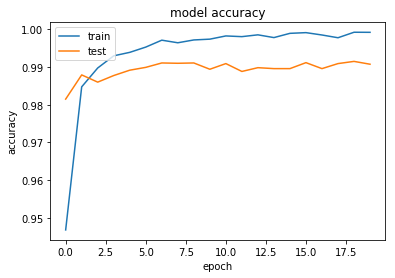

In [9]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

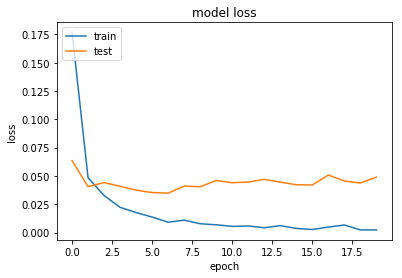

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()